# Closer look at TF activities for select TFs
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData
import matplotlib.pyplot as plt

# Data loading

In [6]:
#TODO replace this with activity scores from WT_01 and WT_02
WT_01 = pd.read_csv("WT_01_tf_activity_scores.csv", index_col=0)
WT_02 = pd.read_csv("WT_02_tf_activity_scores.csv", index_col=0)


In [7]:
all_data = pd.concat([WT_01, WT_02])
all_data

,ABL1,AHR,AHRR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,...,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,NACC1,RXRG
mlm_WT_01,-0.891940,-1.714109,-0.296309,-1.758267,1.766951,0.500760,0.897260,1.160287,-0.242642,0.611746,...,-0.971826,-3.328675,-0.744073,0.947257,-0.650957,0.304556,-1.312572,-1.729958,NaN,NaN
mlm_WT_02,0.671363,-2.143437,NaN,-0.891009,2.127700,0.416909,0.406739,0.243570,-0.219083,2.129548,...,0.363123,-2.604168,-0.998503,0.564342,0.378215,0.680732,-0.689098,-1.342226,0.079265,1.0952


In [8]:
all_data["MAFA"]

mlm_WT_01    1.613522
mlm_WT_02    0.587540
Name: MAFA, dtype: float64

In [9]:
all_data["ABL1"]

mlm_WT_01   -0.891940
mlm_WT_02    0.671363
Name: ABL1, dtype: float64

# Add list of TF to look at

In [10]:
df = pd.read_csv("../data/table_comparison_all_GOI.csv")
tf_activities_list = df["WT_GOI"].tolist()
#len(tf_activities_list)
tf_activities_list = set(tf_activities_list)
#len(tf_activities_list)

# For each interesting TF generate a plot and save in dir

MLM Correlation for MEF2C: -1.00


/tmp/ipykernel_8949/2452388444.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(label, (all_data[l][i], all_data['MAFA'][i]))


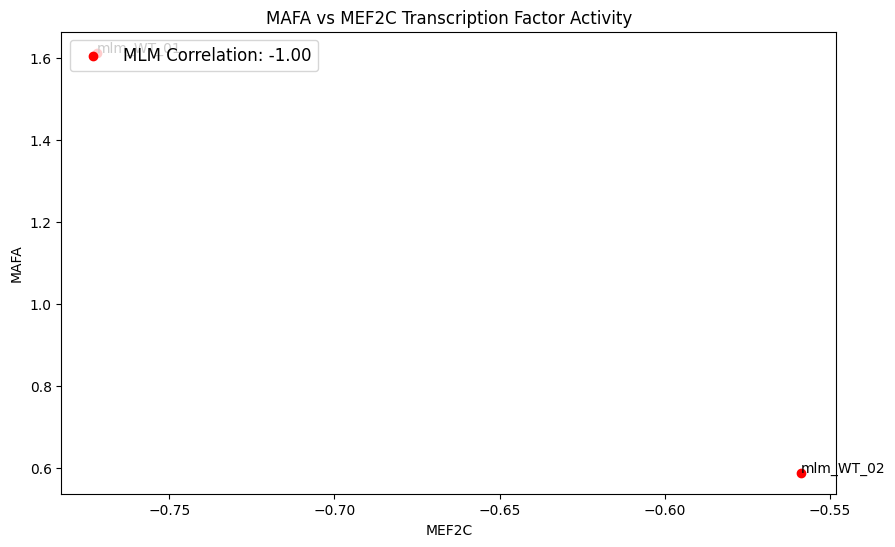

MLM Correlation for AHR: 1.00


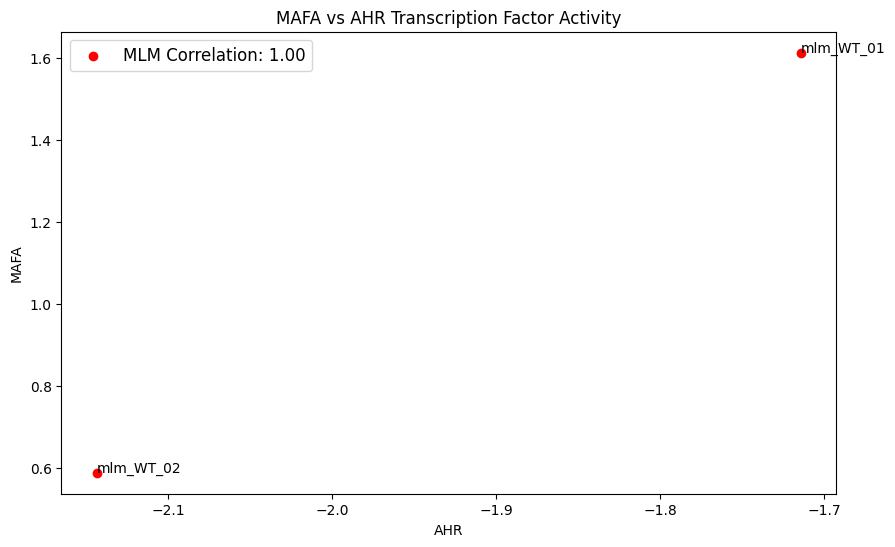

MLM Correlation for YBX3: -1.00


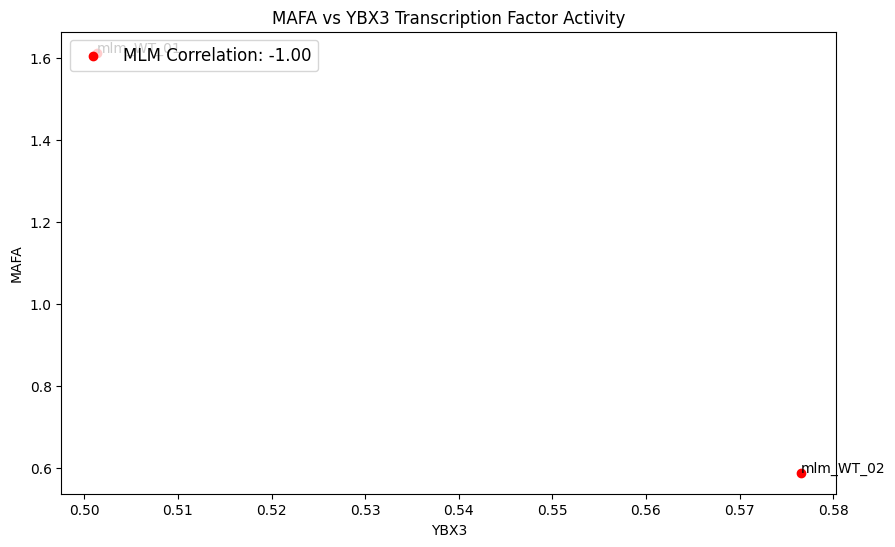

MLM Correlation for REST: 1.00


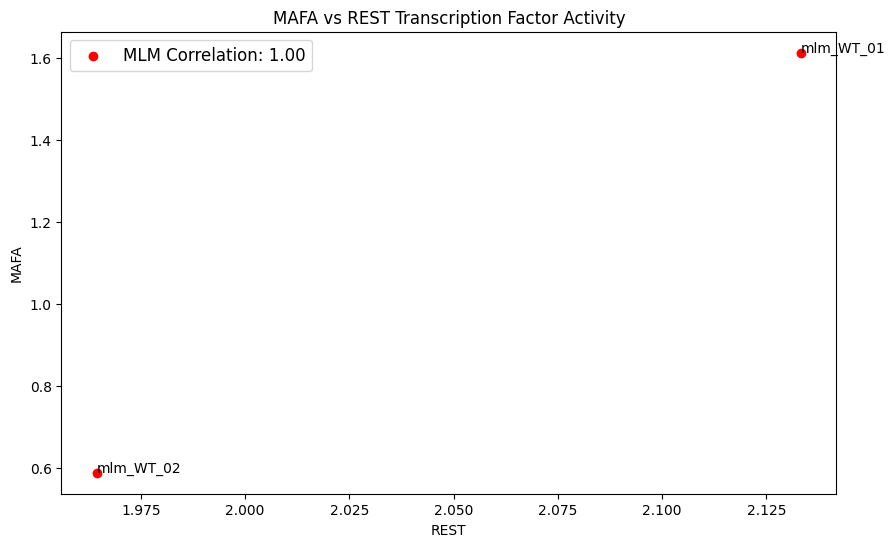

MLM Correlation for NKX6-1: 1.00


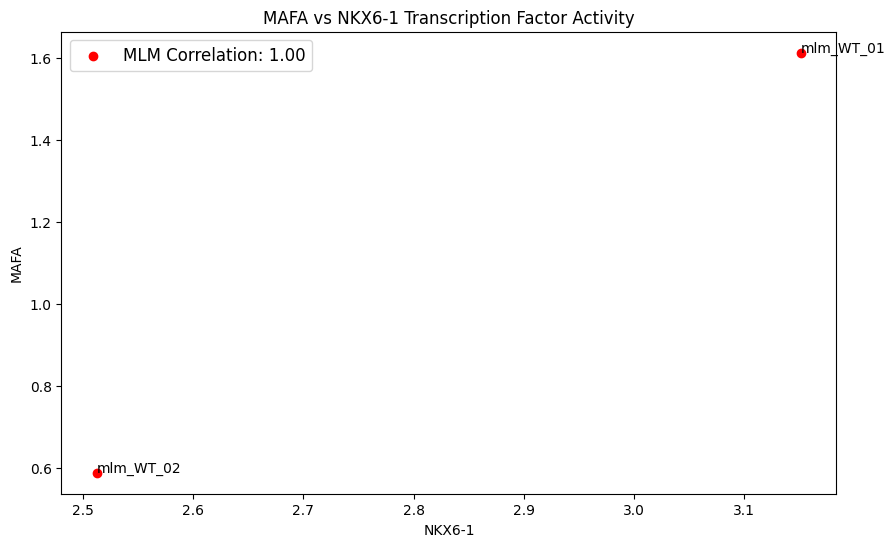

MLM Correlation for MITF: -1.00


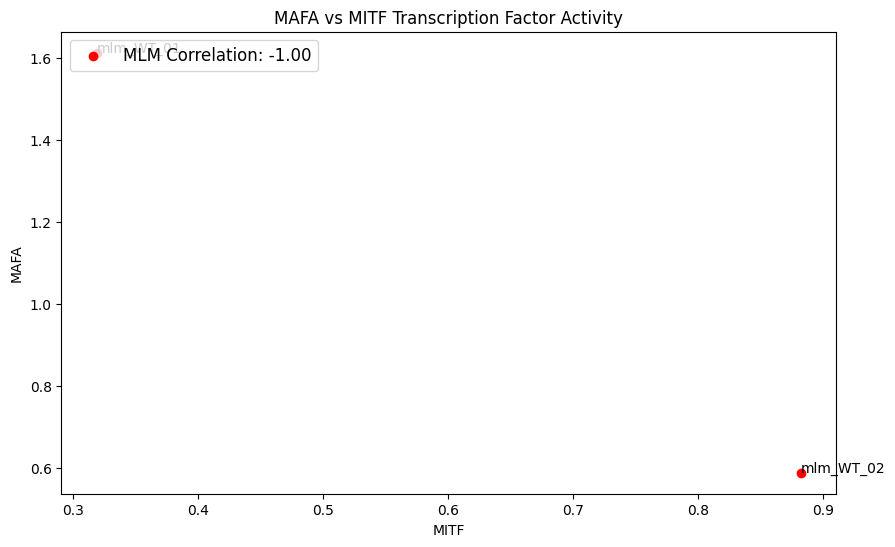

MLM Correlation for E2F2: 1.00


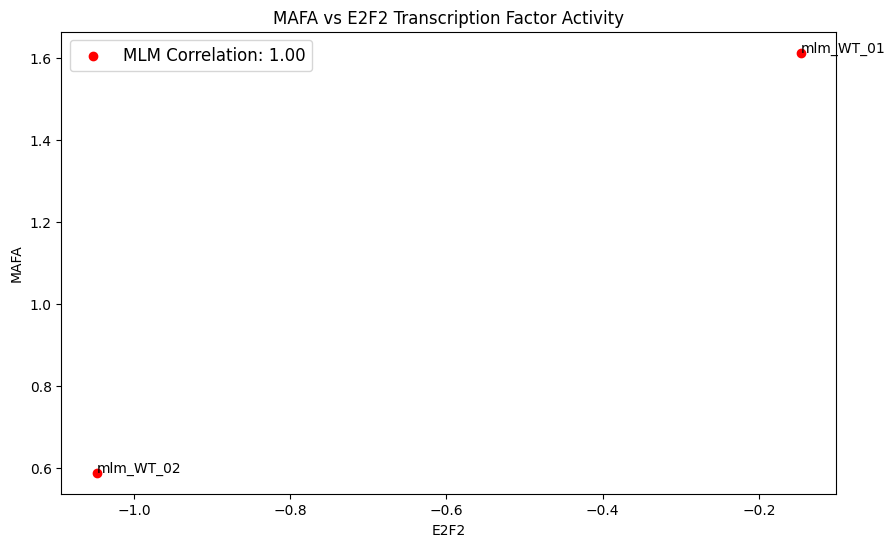

MLM Correlation for IRF2: 1.00


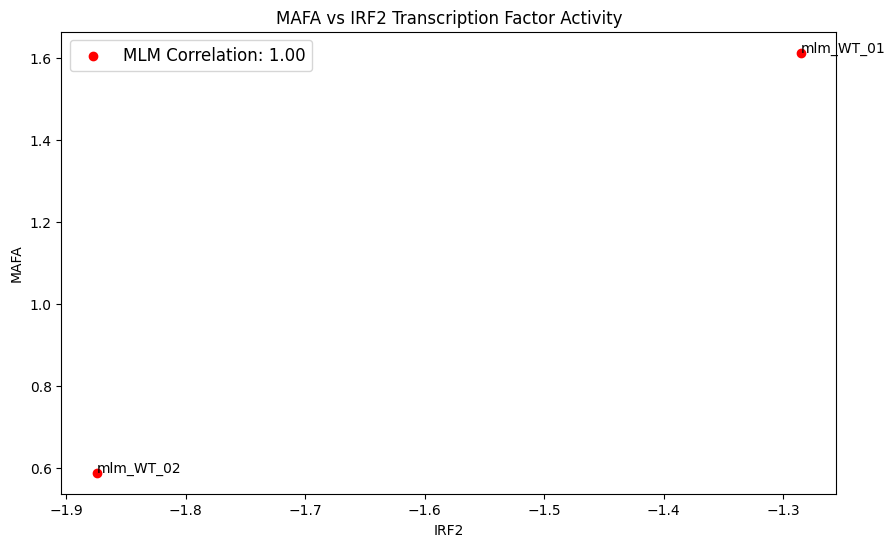

MLM Correlation for ASCL1: 1.00


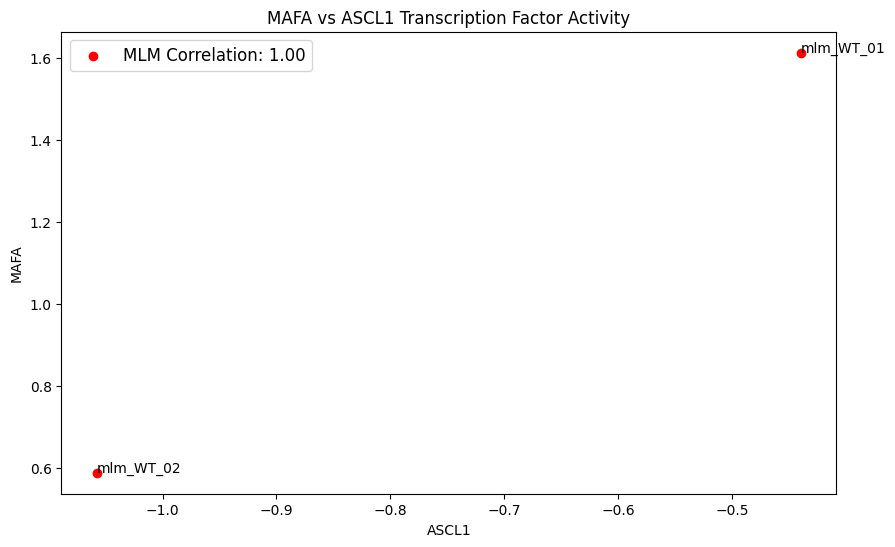

MLM Correlation for E2F1: 1.00


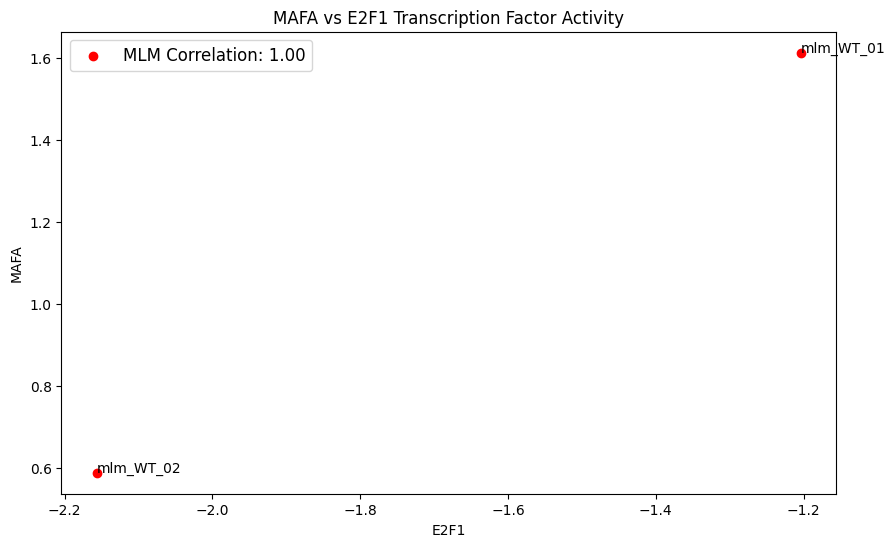

MLM Correlation for PDX1: 1.00


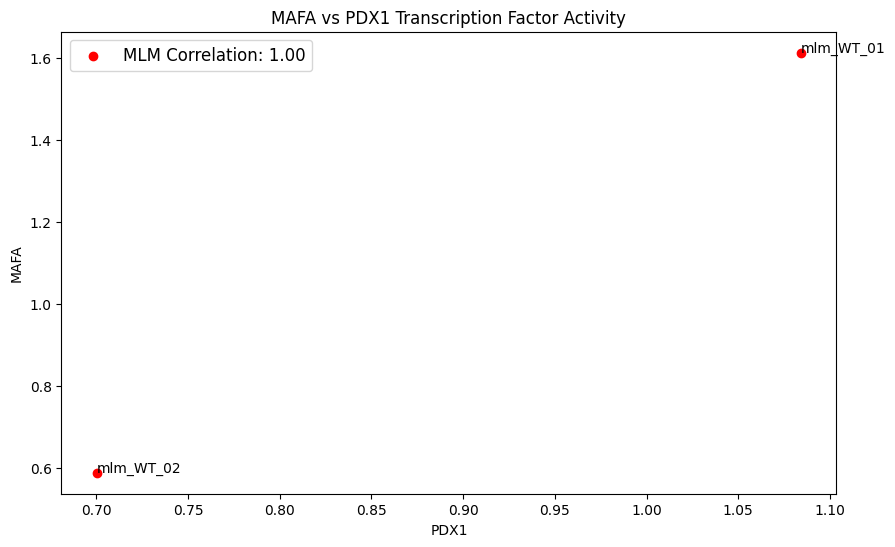

MLM Correlation for NR3C1: 1.00


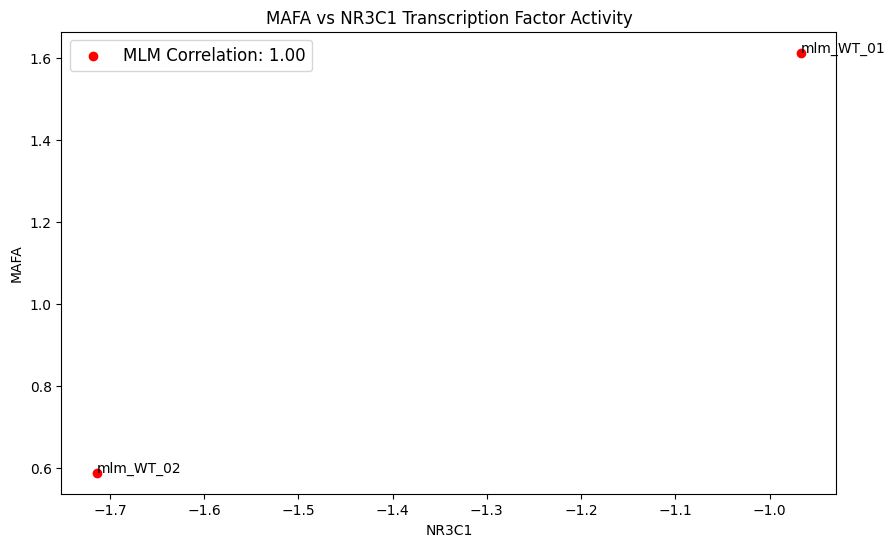

MLM Correlation for MXI1: -1.00


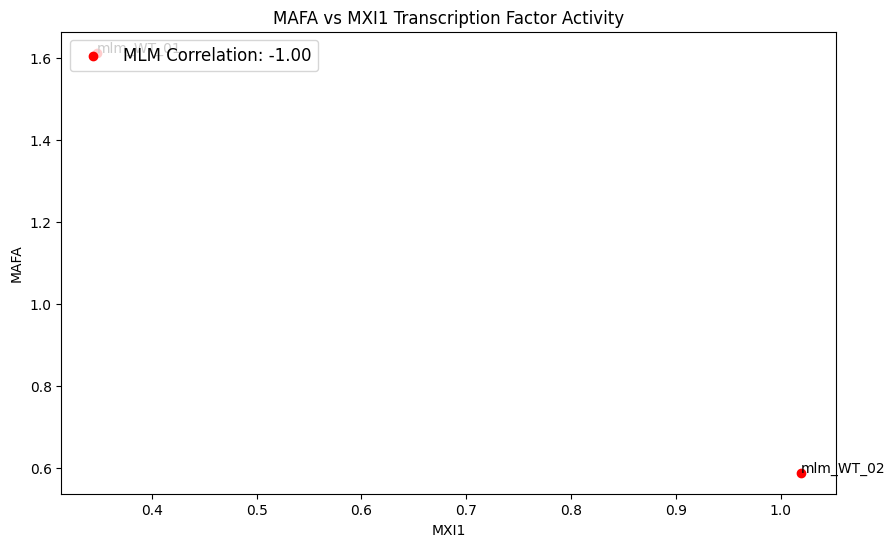

MLM Correlation for FOXM1: 1.00


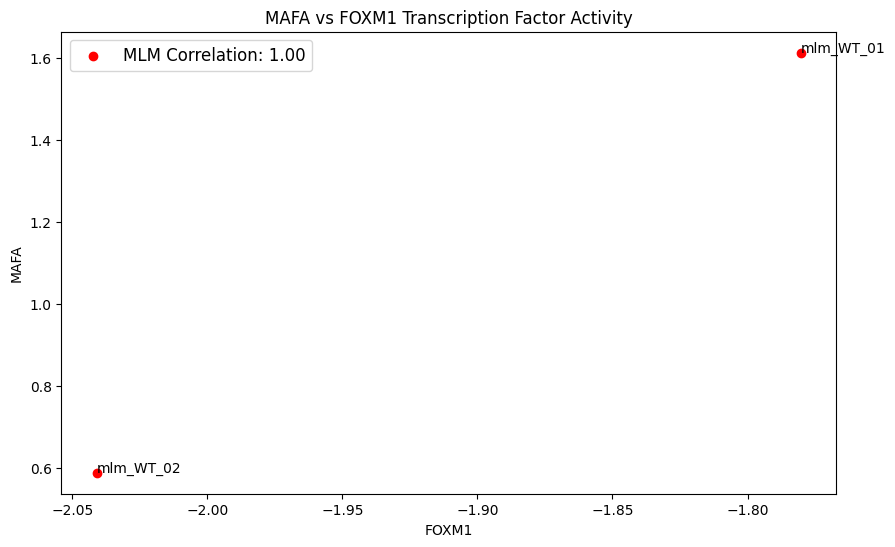

MLM Correlation for MAFA: 1.00


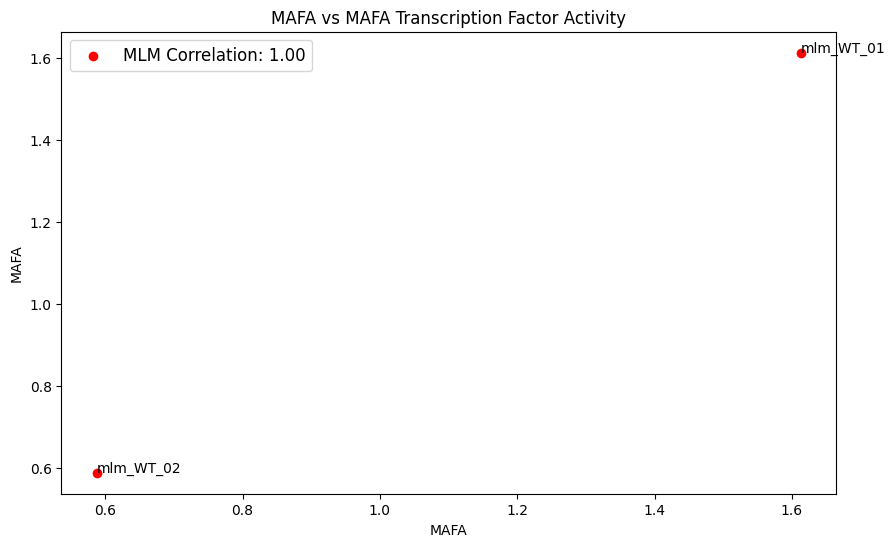

MLM Correlation for NEUROD1: -1.00


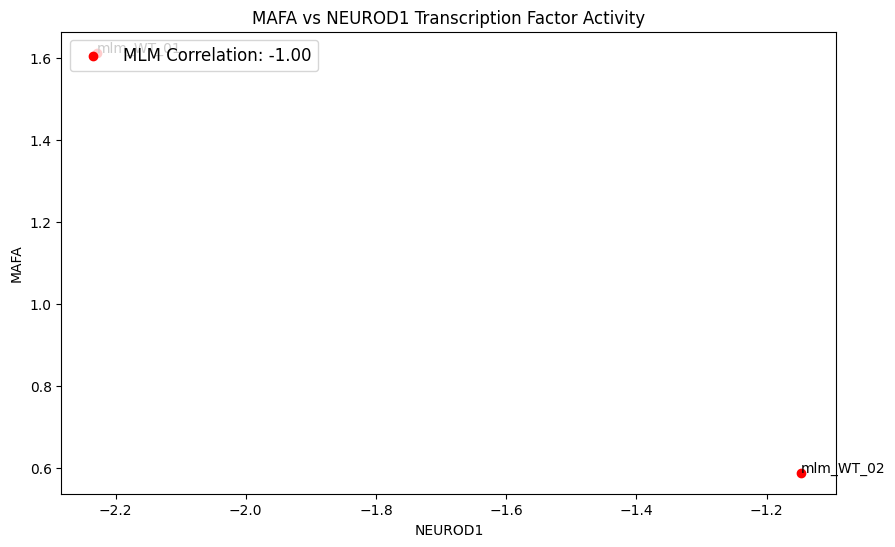

MLM Correlation for HNF1B: -1.00


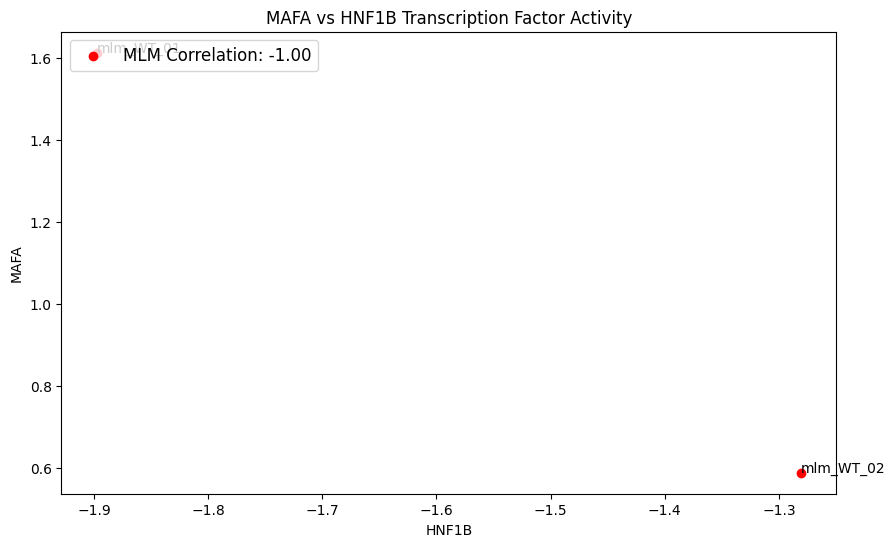

MLM Correlation for MLXIP: 1.00


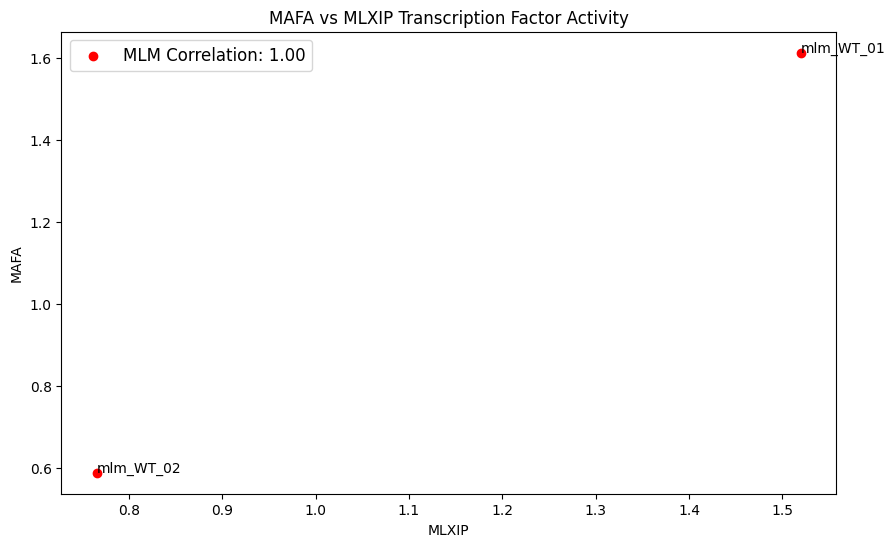

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MLM Correlation for ARID5B: nan


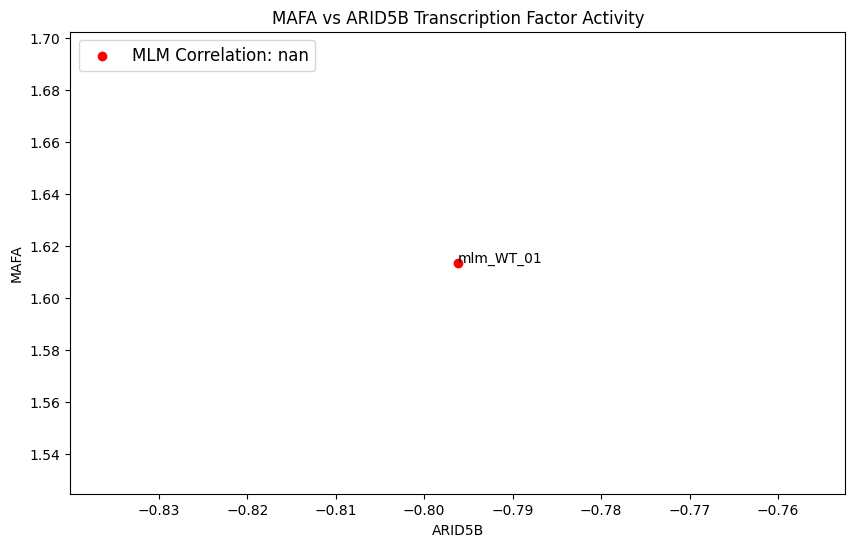

MLM Correlation for NR1D1: 1.00


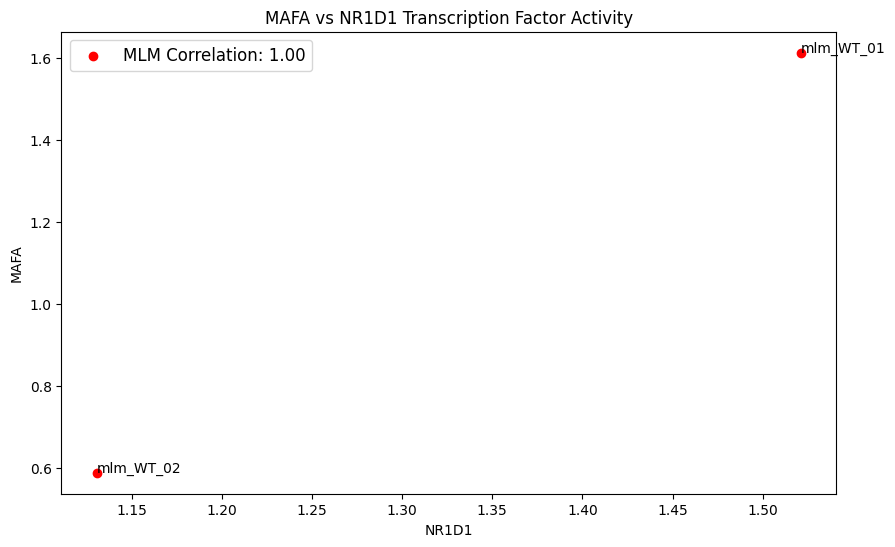

MLM Correlation for HEYL: nan


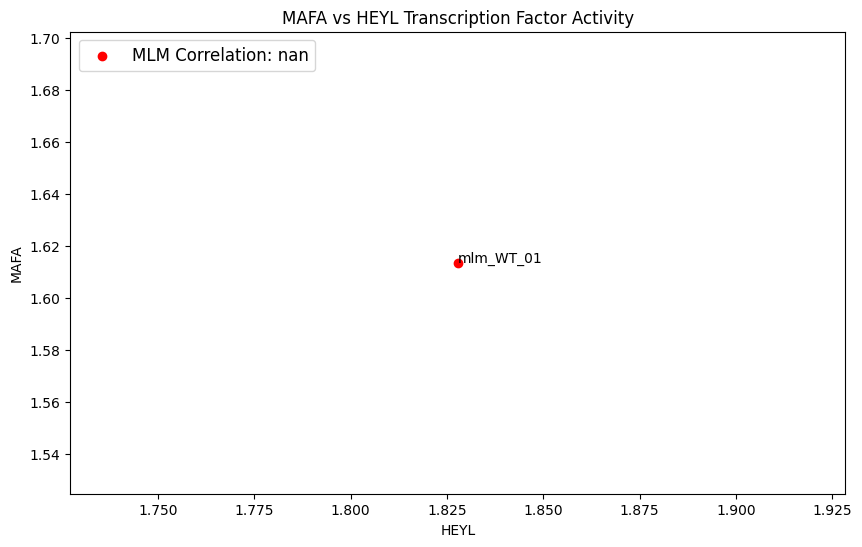

MLM Correlation for STAT3: -1.00


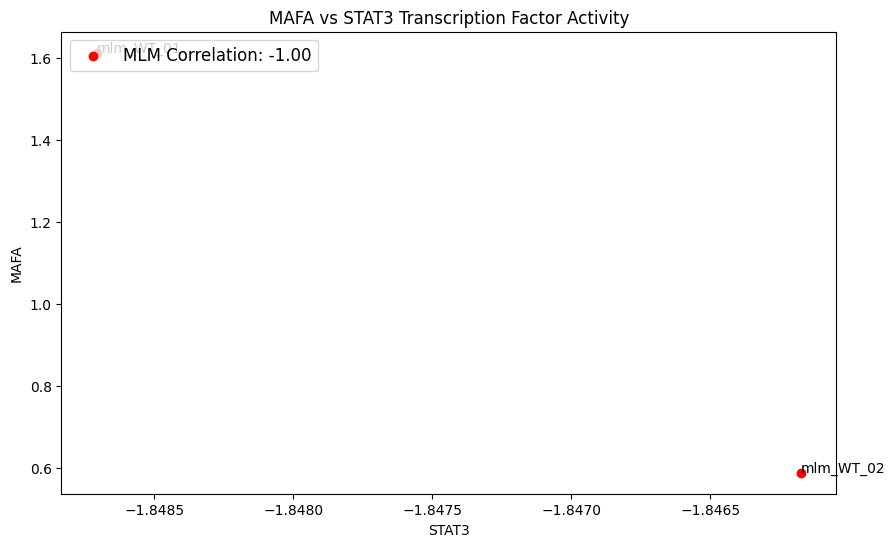

MLM Correlation for PGR: 1.00


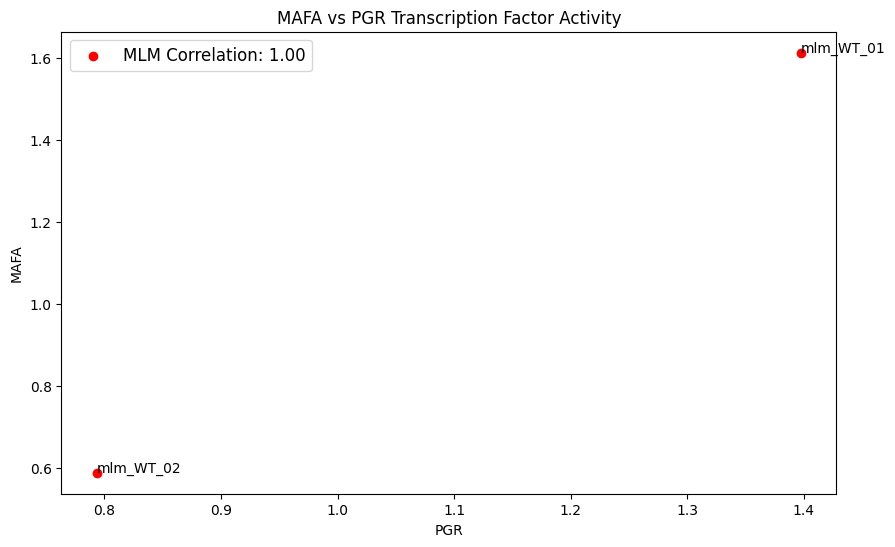

MLM Correlation for ZBTB17: -1.00


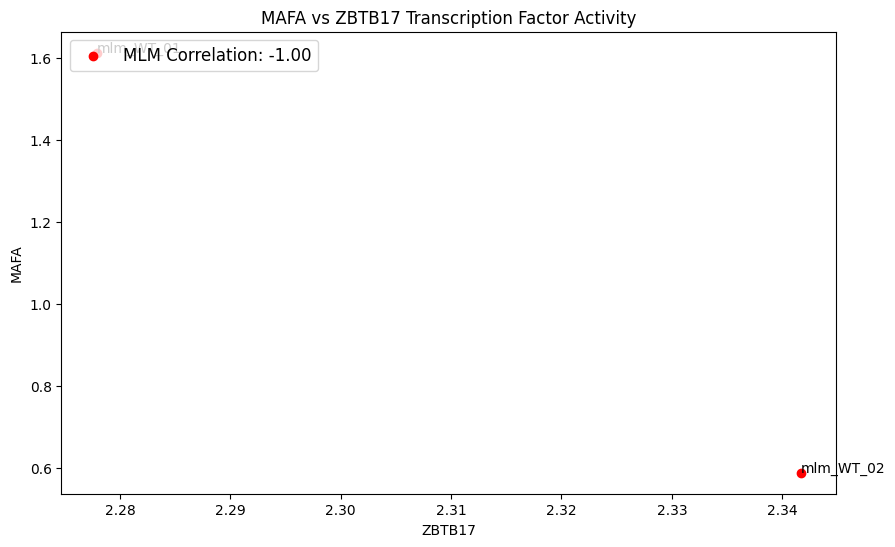

MLM Correlation for WWTR1: 1.00


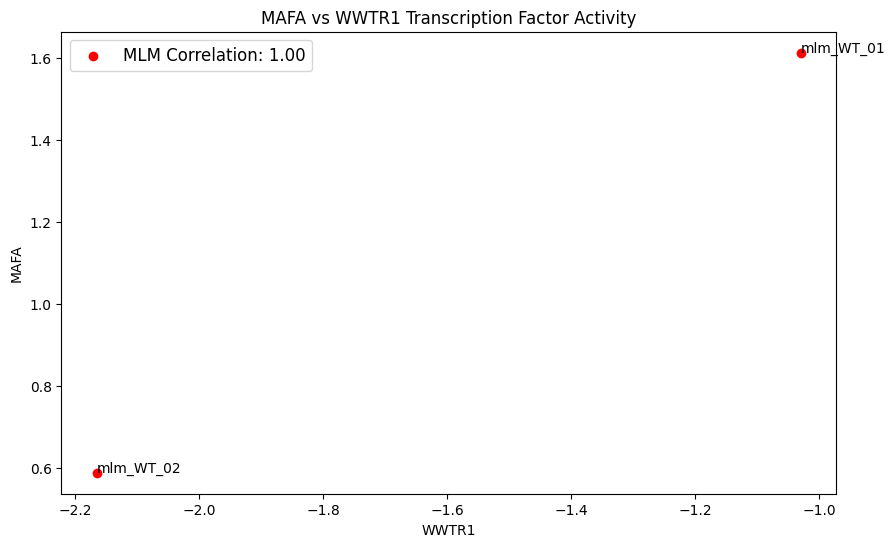

MLM Correlation for IRX1: -1.00


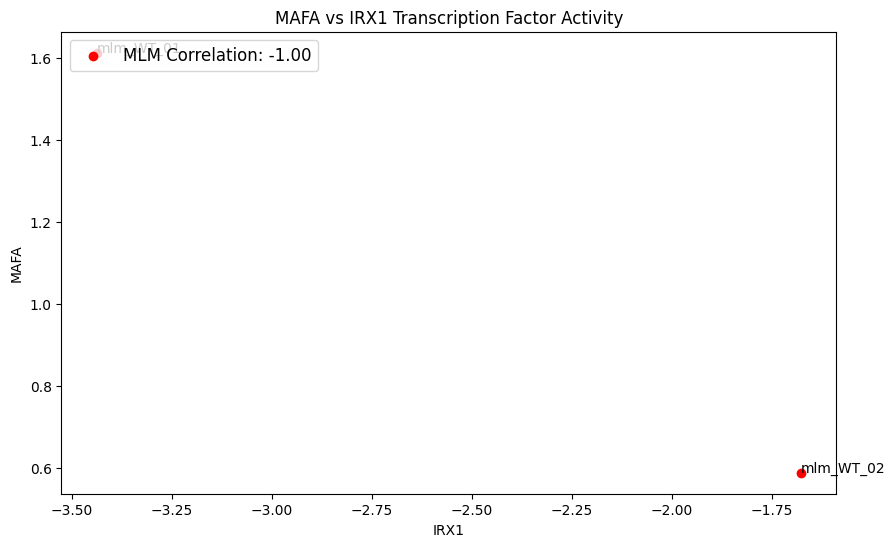

MLM Correlation for FHL2: -1.00


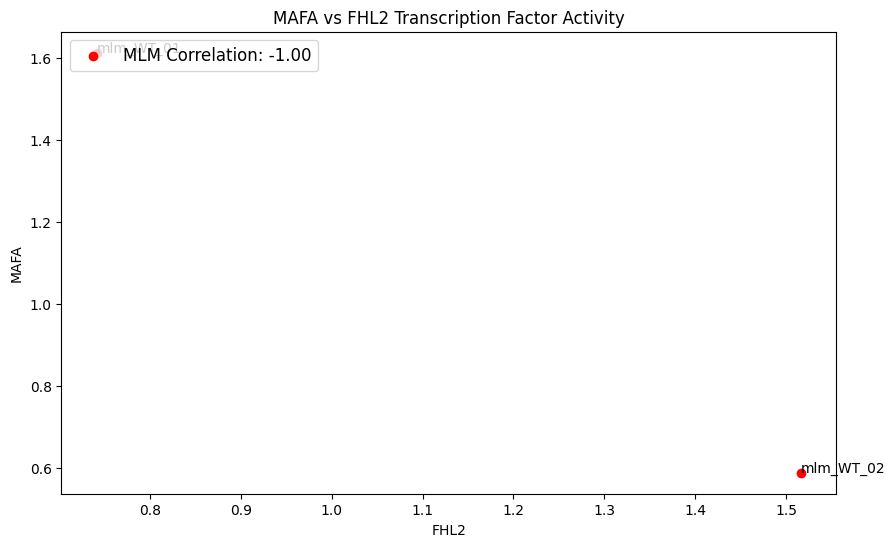

MLM Correlation for ASCL2: 1.00


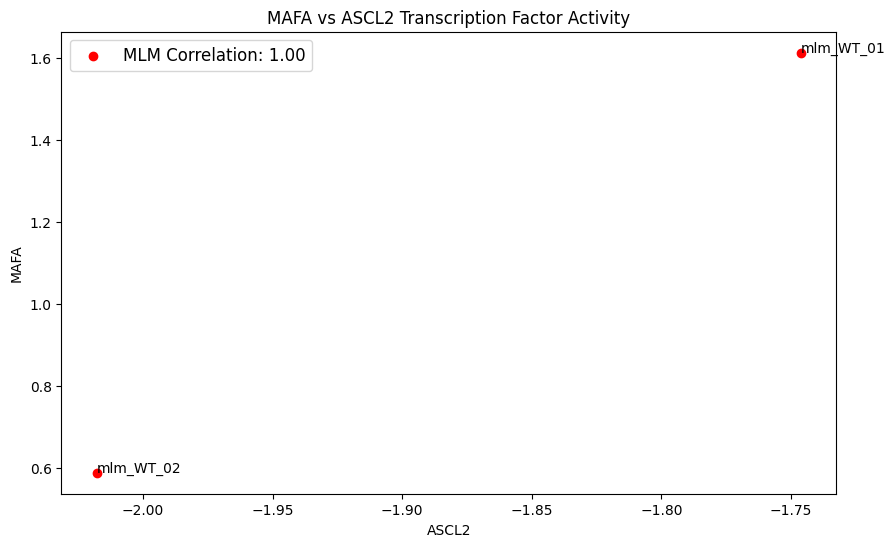

MLM Correlation for GLIS3: -1.00


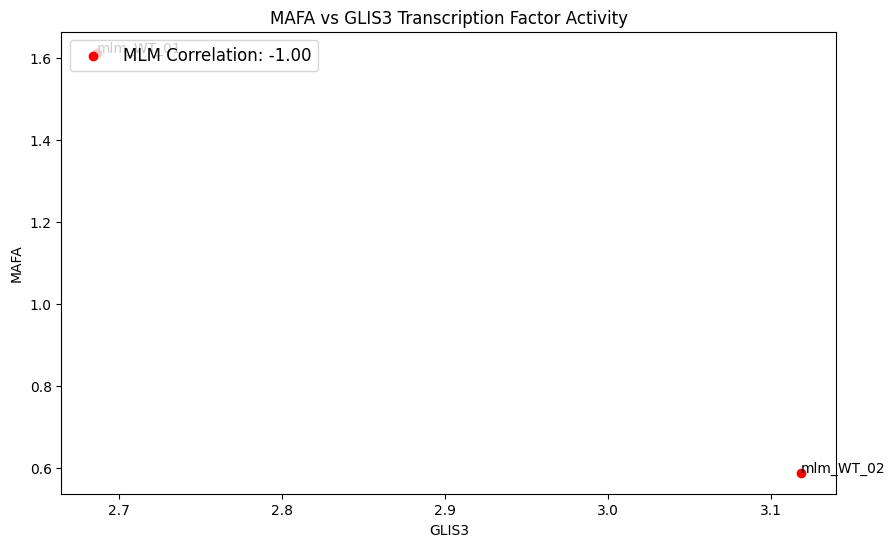

MLM Correlation for E2F3: -1.00


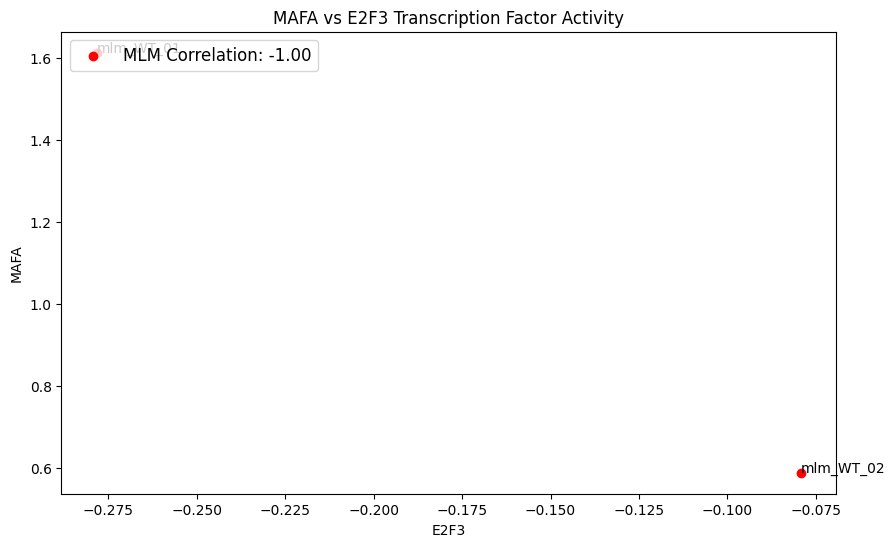

MLM Correlation for NR1H4: -1.00


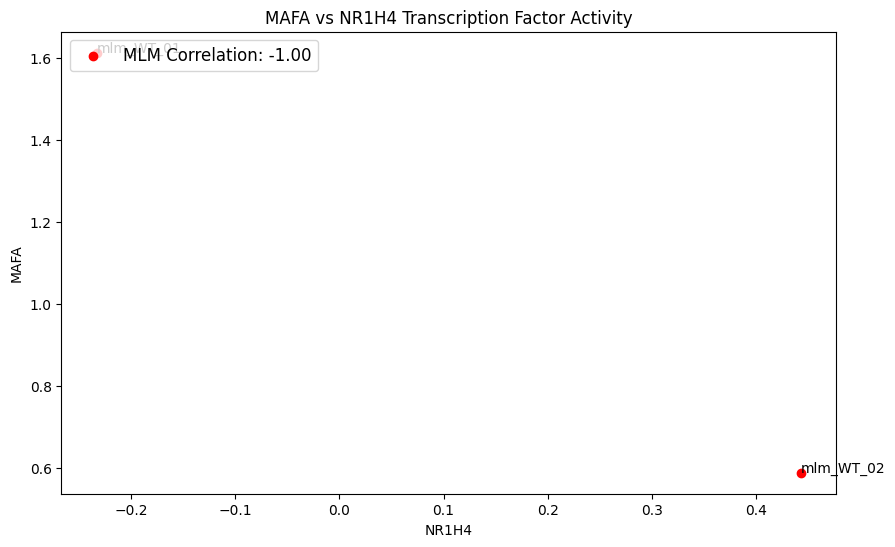

In [11]:
for l in tf_activities_list:
    name = l + ".png"
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ['blue' if label.startswith('ulm') else 'red' for label in all_data.index]
    mlm_data = all_data.loc[all_data.index.str.startswith('mlm')]

    # Create scatter plot
    mlm_scatter = ax.scatter(x=mlm_data[l], y=mlm_data['MAFA'], c='red', label="MLM")

    # Annotate data points with labels
    for i, label in enumerate(all_data.index):
        ax.annotate(label, (all_data[l][i], all_data['MAFA'][i]))

    # Calculate correlations
    mlm_correlation = mlm_data[l].corr(mlm_data['MAFA'])

    # Create legend text
    mlm_legend_text = f"MLM Correlation: {mlm_correlation:.2f}"

    # Add legend
    ax.legend([mlm_scatter], [mlm_legend_text], loc='upper left', fontsize=12)

    print(f"MLM Correlation for {l}: {mlm_correlation:.2f}")

    plt.ylabel('MAFA')
    plt.xlabel(l)
    plt.title(f'MAFA vs {l} Transcription Factor Activity')
    plt.show()
    
    fig.savefig(f"../figures/interesting_tfs/WT/{name}", dpi=300)